 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# XOR input and target
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])

y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

# Simple feedforward network for XOR
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(60000):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Final predictions
with torch.no_grad():
    preds = model(X)
    print("\nPredictions:")
    print(preds.round())


Epoch 0, Loss: 0.7252
Epoch 1000, Loss: 0.0608
Epoch 2000, Loss: 0.0171
Epoch 3000, Loss: 0.0093
Epoch 4000, Loss: 0.0063
Epoch 5000, Loss: 0.0047
Epoch 6000, Loss: 0.0037
Epoch 7000, Loss: 0.0031
Epoch 8000, Loss: 0.0026
Epoch 9000, Loss: 0.0023
Epoch 10000, Loss: 0.0020
Epoch 11000, Loss: 0.0018
Epoch 12000, Loss: 0.0016
Epoch 13000, Loss: 0.0015
Epoch 14000, Loss: 0.0014
Epoch 15000, Loss: 0.0013
Epoch 16000, Loss: 0.0012
Epoch 17000, Loss: 0.0011
Epoch 18000, Loss: 0.0010
Epoch 19000, Loss: 0.0010
Epoch 20000, Loss: 0.0009
Epoch 21000, Loss: 0.0009
Epoch 22000, Loss: 0.0008
Epoch 23000, Loss: 0.0008
Epoch 24000, Loss: 0.0007
Epoch 25000, Loss: 0.0007
Epoch 26000, Loss: 0.0007
Epoch 27000, Loss: 0.0007
Epoch 28000, Loss: 0.0006
Epoch 29000, Loss: 0.0006
Epoch 30000, Loss: 0.0006
Epoch 31000, Loss: 0.0006
Epoch 32000, Loss: 0.0005
Epoch 33000, Loss: 0.0005
Epoch 34000, Loss: 0.0005
Epoch 35000, Loss: 0.0005
Epoch 36000, Loss: 0.0005
Epoch 37000, Loss: 0.0005
Epoch 38000, Loss: 0.0004

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [6]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #



###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [8]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

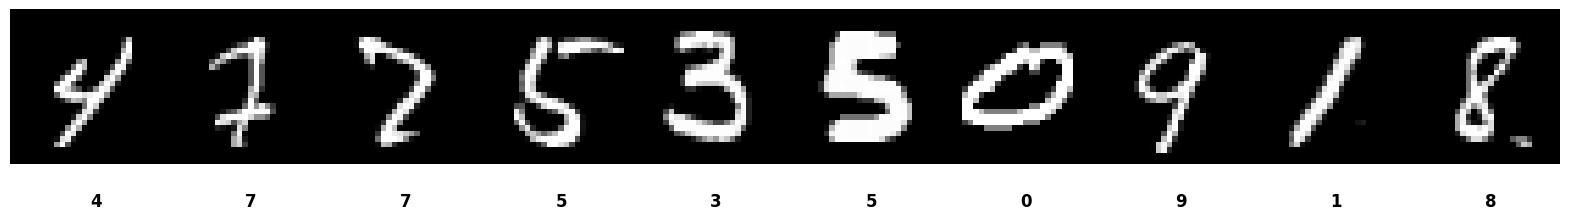

In [14]:
display_random_images(x_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [15]:
# Normalize images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to match CNN input shape (samples, height, width, channels)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [16]:
# Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [18]:
# Set values for compilation
loss = 'categorical_crossentropy'         # for multi-class classification
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adam optimizer with learning rate
metrics = ['accuracy']
learning_rate = 0.001

###################################
# Compile the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
###################################

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [19]:
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=128,
                    verbose=2)

Epoch 1/5
375/375 - 38s - 102ms/step - accuracy: 0.8956 - loss: 0.3417 - val_accuracy: 0.9758 - val_loss: 0.0829
Epoch 2/5
375/375 - 44s - 117ms/step - accuracy: 0.9674 - loss: 0.1091 - val_accuracy: 0.9838 - val_loss: 0.0538
Epoch 3/5
375/375 - 39s - 103ms/step - accuracy: 0.9763 - loss: 0.0791 - val_accuracy: 0.9876 - val_loss: 0.0440
Epoch 4/5
375/375 - 41s - 109ms/step - accuracy: 0.9807 - loss: 0.0624 - val_accuracy: 0.9883 - val_loss: 0.0408
Epoch 5/5
375/375 - 44s - 118ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9886 - val_loss: 0.0400


#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

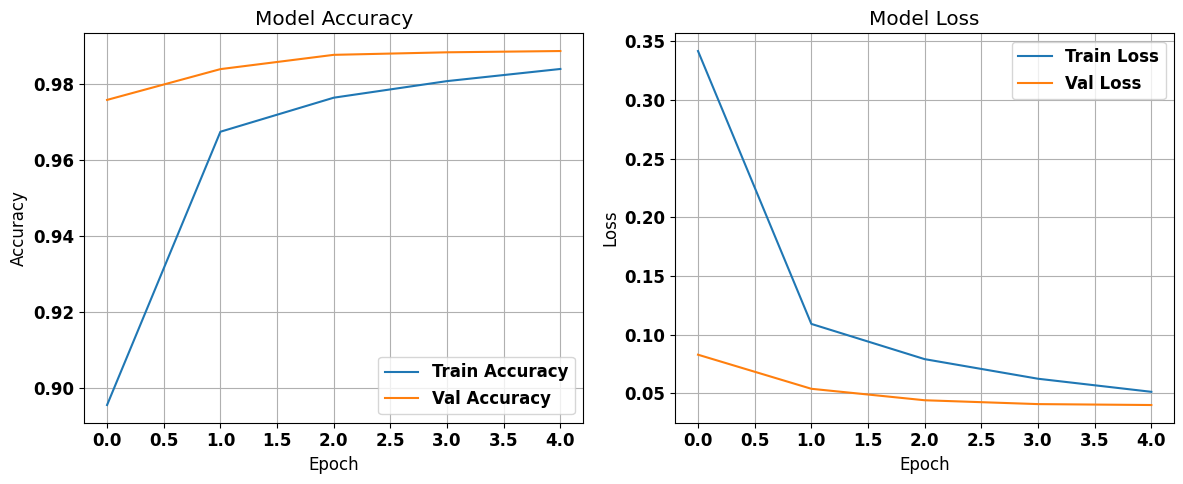

In [20]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

Test Loss: 0.0299
Test Accuracy: 0.9894
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



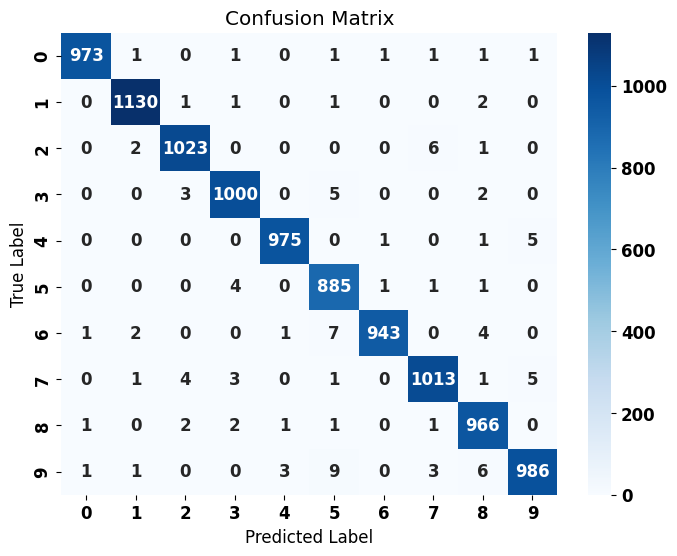

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict classes on the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 - 45s - 60ms/step - accuracy: 0.9097 - loss: 0.4675 - val_accuracy: 0.9776 - val_loss: 0.2141
Epoch 2/20
750/750 - 78s - 105ms/step - accuracy: 0.9639 - loss: 0.2422 - val_accuracy: 0.9827 - val_loss: 0.1652
Epoch 3/20
750/750 - 41s - 55ms/step - accuracy: 0.9693 - loss: 0.2053 - val_accuracy: 0.9818 - val_loss: 0.1565
Epoch 4/20
750/750 - 41s - 54ms/step - accuracy: 0.9718 - loss: 0.1879 - val_accuracy: 0.9844 - val_loss: 0.1430
Epoch 5/20
750/750 - 41s - 55ms/step - accuracy: 0.9740 - loss: 0.1761 - val_accuracy: 0.9847 - val_loss: 0.1382
Epoch 6/20
750/750 - 39s - 51ms/step - accuracy: 0.9759 - loss: 0.1678 - val_accuracy: 0.9872 - val_loss: 0.1306
Epoch 7/20
750/750 - 39s - 51ms/step - accuracy: 0.9764 - loss: 0.1638 - val_accuracy: 0.9858 - val_loss: 0.1312
Epoch 8/20
750/750 - 43s - 57ms/step - accuracy: 0.9771 - loss: 0.1593 - val_accuracy: 0.9858 - val_loss: 0.1287
Epoch 9/20
750/750 - 40s - 54ms/step - accuracy: 0.9781 - loss: 0.1531 - val_accuracy: 0.9873 -

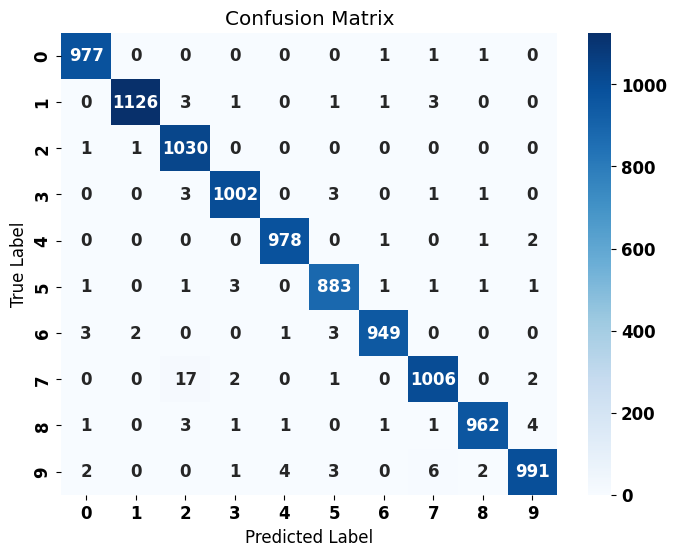

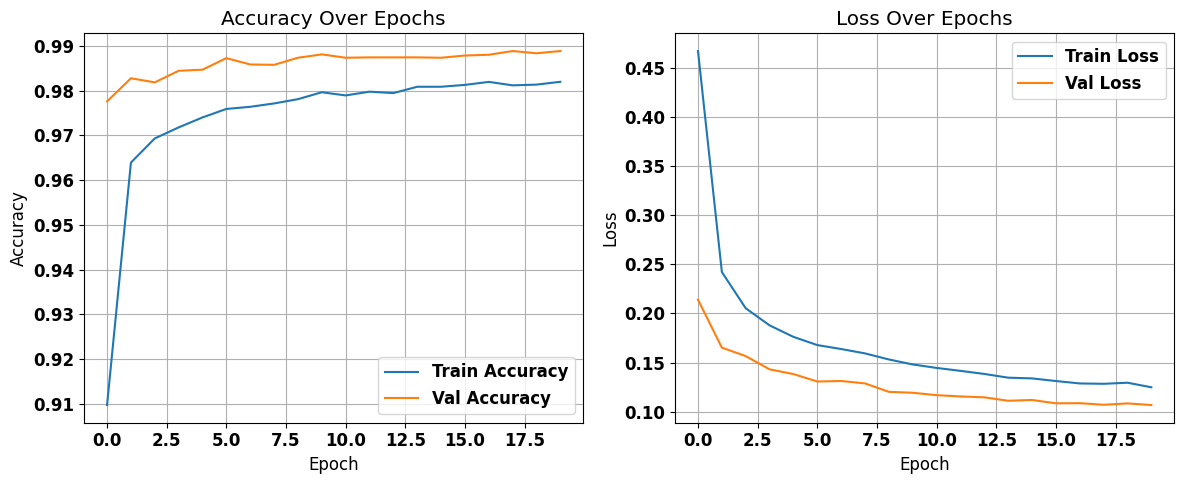

In [22]:
# ----------------------------
# 1. Import Libraries
# ----------------------------
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib

# For plot styling
font = {'weight' : 'bold', 'size' : 12}
matplotlib.rc('font', **font)

# ----------------------------
# 2. Load and Preprocess Data
# ----------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# ----------------------------
# 3. Build Model with Regularization
# ----------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')
])

# ----------------------------
# 4. Compile the Model
# ----------------------------
learning_rate = 0.001
loss = 'categorical_crossentropy'
optimizer = Adam(learning_rate=learning_rate)
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()

# ----------------------------
# 5. Train the Model
# ----------------------------
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=2
)

# ----------------------------
# 6. Evaluate on Test Data
# ----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Predict & prepare for confusion matrix
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# ----------------------------
# 7. Classification Report
# ----------------------------
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# ----------------------------
# 8. Confusion Matrix
# ----------------------------
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ----------------------------
# 9. Plot Training History
# ----------------------------
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
